## **Udemy: Finance & Accounting Courses Analysis**

### **Problem Statement:**  
This project involves analyzing and predicting course performance on a learning platform. Specifically, you will use data related to finance and accounting courses and build a machine learning model to predict num_subscribers or avg_rating based on features such as course title, price, and number of lectures. This project will focus on understanding relationships in the data and predicting course success.

### **Objective:**  
Predict the number of subscribers or average rating of finance and accounting courses using the available data.


In [2]:
#Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [5]:
# Load the Dataset                                                                                                                   
df = pd.read_csv('udemy_raw.csv')
df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [6]:
# Getting shape of dataset
df.shape

(13608, 20)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

In [8]:
df.drop(columns=['url','avg_rating', 'avg_rating_recent','price_detail__price_string', 'discount_price__price_string',
                 'price_detail__currency', 'discount_price__currency'], inplace=True)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   is_paid                       13608 non-null  bool   
 3   num_subscribers               13608 non-null  int64  
 4   rating                        13608 non-null  float64
 5   num_reviews                   13608 non-null  int64  
 6   is_wishlisted                 13608 non-null  bool   
 7   num_published_lectures        13608 non-null  int64  
 8   num_published_practice_tests  13608 non-null  int64  
 9   created                       13608 non-null  object 
 10  published_time                13608 non-null  object 
 11  discount_price__amount        12205 non-null  float64
 12  price_detail__amount          13111 non-null  float64
dtypes

In [10]:
df['created'] = pd.to_datetime(df['created'])
df['published_time'] = pd.to_datetime(df['published_time'])
df['published_time'] = df['published_time'].dt.tz_localize(None)

In [11]:
df['is_paid'] = df['is_paid'].astype(int)
df['is_wishlisted'] = df['is_wishlisted'].astype(int)
df.head()

,id,title,is_paid,num_subscribers,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,1,295509,4.67874,78006,0,84,0,2016-02-14 22:57:48+00:00,2016-04-06 05:16:11,455.0,8640.0
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,1,209070,4.60015,54581,0,78,0,2016-08-22 12:10:18+00:00,2016-08-23 16:59:49,455.0,8640.0
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,1,155282,4.59326,52653,0,292,2,2017-09-26 16:32:48+00:00,2017-11-14 23:58:14,455.0,8640.0
3,648826,The Complete Financial Analyst Course 2020,1,245860,4.53772,46447,0,338,0,2015-10-23 13:34:35+00:00,2016-01-21 01:38:48,455.0,8640.0
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,1,374836,4.47173,41630,0,83,0,2015-10-12 06:39:46+00:00,2016-01-11 21:39:33,455.0,8640.0


In [12]:
# Checking for Duplicate values
df.duplicated().sum()

np.int64(0)

In [13]:
# Checking for null values
print(df.isnull().sum())

id                                 0
title                              0
is_paid                            0
num_subscribers                    0
rating                             0
num_reviews                        0
is_wishlisted                      0
num_published_lectures             0
num_published_practice_tests       0
created                            0
published_time                     0
discount_price__amount          1403
price_detail__amount             497
dtype: int64


In [14]:
df['price_detail__amount'] = df['price_detail__amount'].fillna(0)
df['discount_price__amount'] = df['discount_price__amount'].fillna(df['price_detail__amount'])

In [15]:
# Checking for null values
print(df.isnull().sum())

id                              0
title                           0
is_paid                         0
num_subscribers                 0
rating                          0
num_reviews                     0
is_wishlisted                   0
num_published_lectures          0
num_published_practice_tests    0
created                         0
published_time                  0
discount_price__amount          0
price_detail__amount            0
dtype: int64


In [32]:
# Statistical summary of numerical columns
df.describe()

,id,is_paid,num_subscribers,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,published_time,discount_price__amount,price_detail__amount
count,1.360800e+04,13608.000000,13608.000000,13608.000000,13608.000000,13608.0,13608.000000,13608.000000,13608,13608.000000,13608.000000
mean,1.681721e+06,0.963551,2847.010435,3.912242,243.169827,0.0,32.224794,0.110523,2018-01-21 11:52:38.277483776,779.784245,4477.272193
min,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2010-04-14 16:32:46,0.000000,0.000000
25%,8.580862e+05,1.000000,62.000000,3.787315,7.000000,0.0,12.000000,0.000000,2016-08-23 16:33:24.249999872,455.000000,1280.000000
50%,1.623421e+06,1.000000,533.000000,4.181735,24.000000,0.0,21.000000,0.000000,2018-05-16 14:23:08,455.000000,3200.000000
75%,2.503720e+06,1.000000,2279.500000,4.452105,87.000000,0.0,37.000000,0.000000,2019-09-25 16:56:30,455.000000,8640.000000
max,3.486006e+06,1.000000,374836.000000,5.000000,78006.000000,0.0,699.000000,6.000000,2020-09-10 06:31:11,12800.000000,12800.000000
std,9.539271e+05,0.187412,9437.865634,1.039237,1580.965895,0.0,42.766911,0.623501,NaN,1567.970784,3173.858399


In [34]:
df.head()

,id,title,is_paid,num_subscribers,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,1,295509,4.67874,78006,0,84,0,2016-02-14 22:57:48+00:00,2016-04-06 05:16:11,455.0,8640.0
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,1,209070,4.60015,54581,0,78,0,2016-08-22 12:10:18+00:00,2016-08-23 16:59:49,455.0,8640.0
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,1,155282,4.59326,52653,0,292,2,2017-09-26 16:32:48+00:00,2017-11-14 23:58:14,455.0,8640.0
3,648826,The Complete Financial Analyst Course 2020,1,245860,4.53772,46447,0,338,0,2015-10-23 13:34:35+00:00,2016-01-21 01:38:48,455.0,8640.0
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,1,374836,4.47173,41630,0,83,0,2015-10-12 06:39:46+00:00,2016-01-11 21:39:33,455.0,8640.0


## Exploratory Data Analysis (EDA)

- Visualize relationships between features.
- Identify trends and patterns.

### 1.Univariate Analysis

It focuses on examining a single variable at a time. It helps in understanding the distribution of the data.

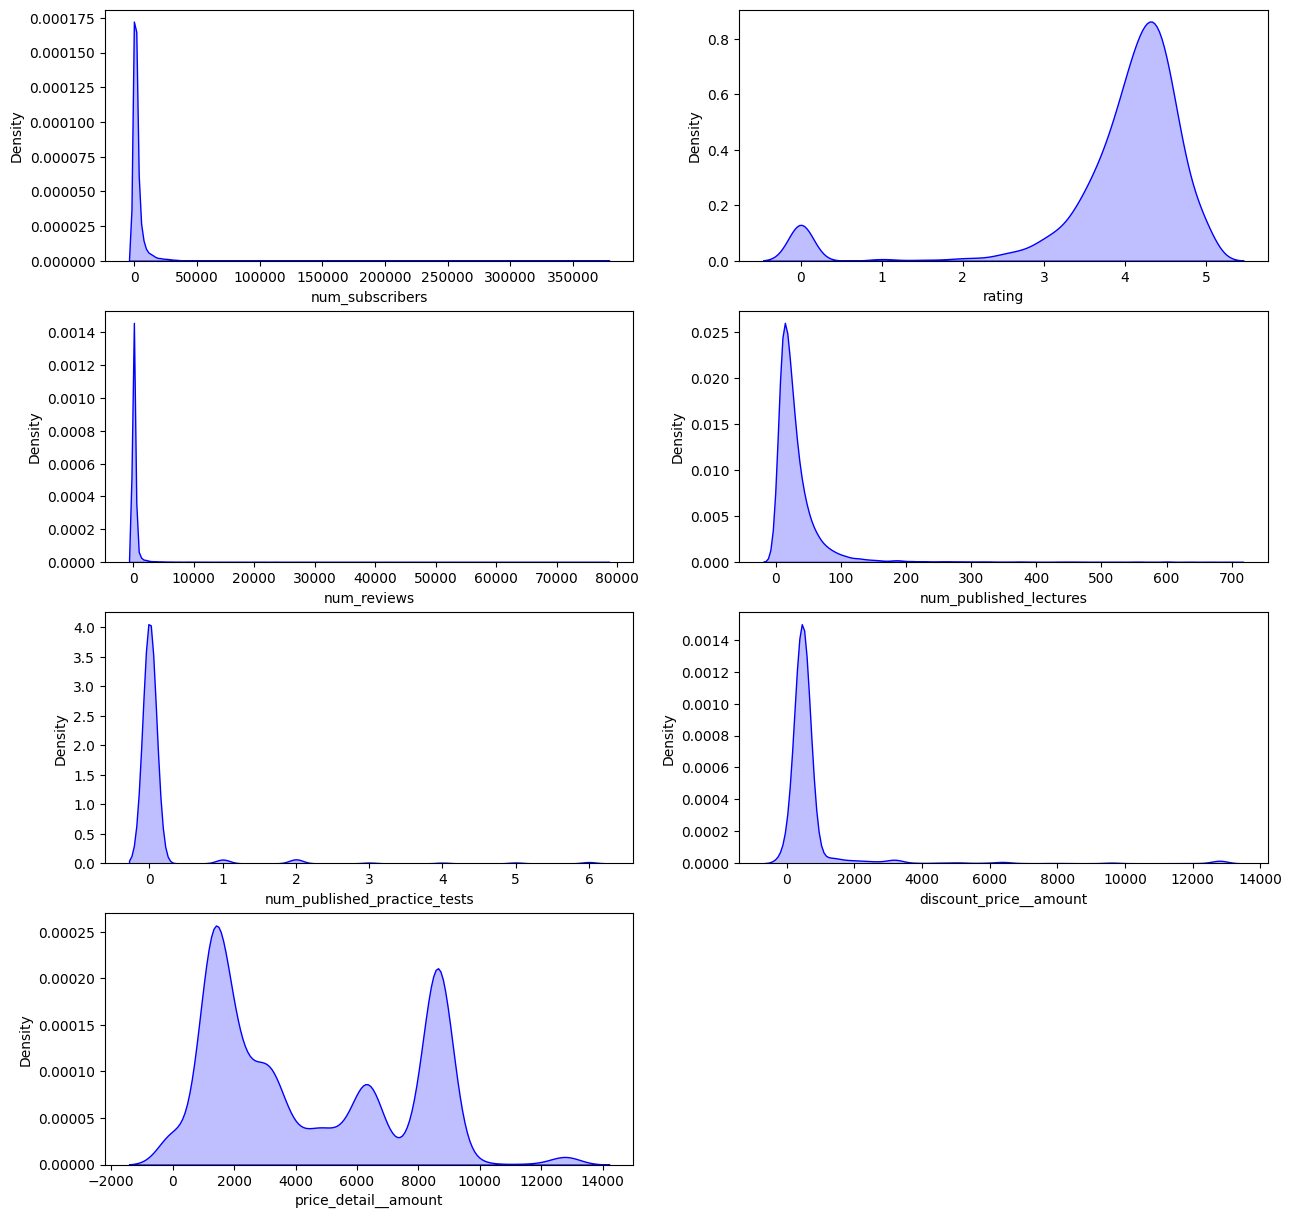

In [41]:
# Univariate analysis
plt.figure(figsize=(15, 15))

numerical_columns = [
    'num_subscribers', 'rating', 'num_reviews', 'num_published_lectures', 
    'num_published_practice_tests','discount_price__amount', 'price_detail__amount'
]

for i in range(len(numerical_columns)):
    plt.subplot(4, 2, i + 1)
    sns.kdeplot(x=df[numerical_columns[i]], fill=True, color='b')  # Replaced shade with fill
    plt.xlabel(numerical_columns[i])

plt.show()

### 2.Bivariate Analysis

It helps in understanding the relationship between two variables, and alows us to know how they are related with each other negatively or postively.

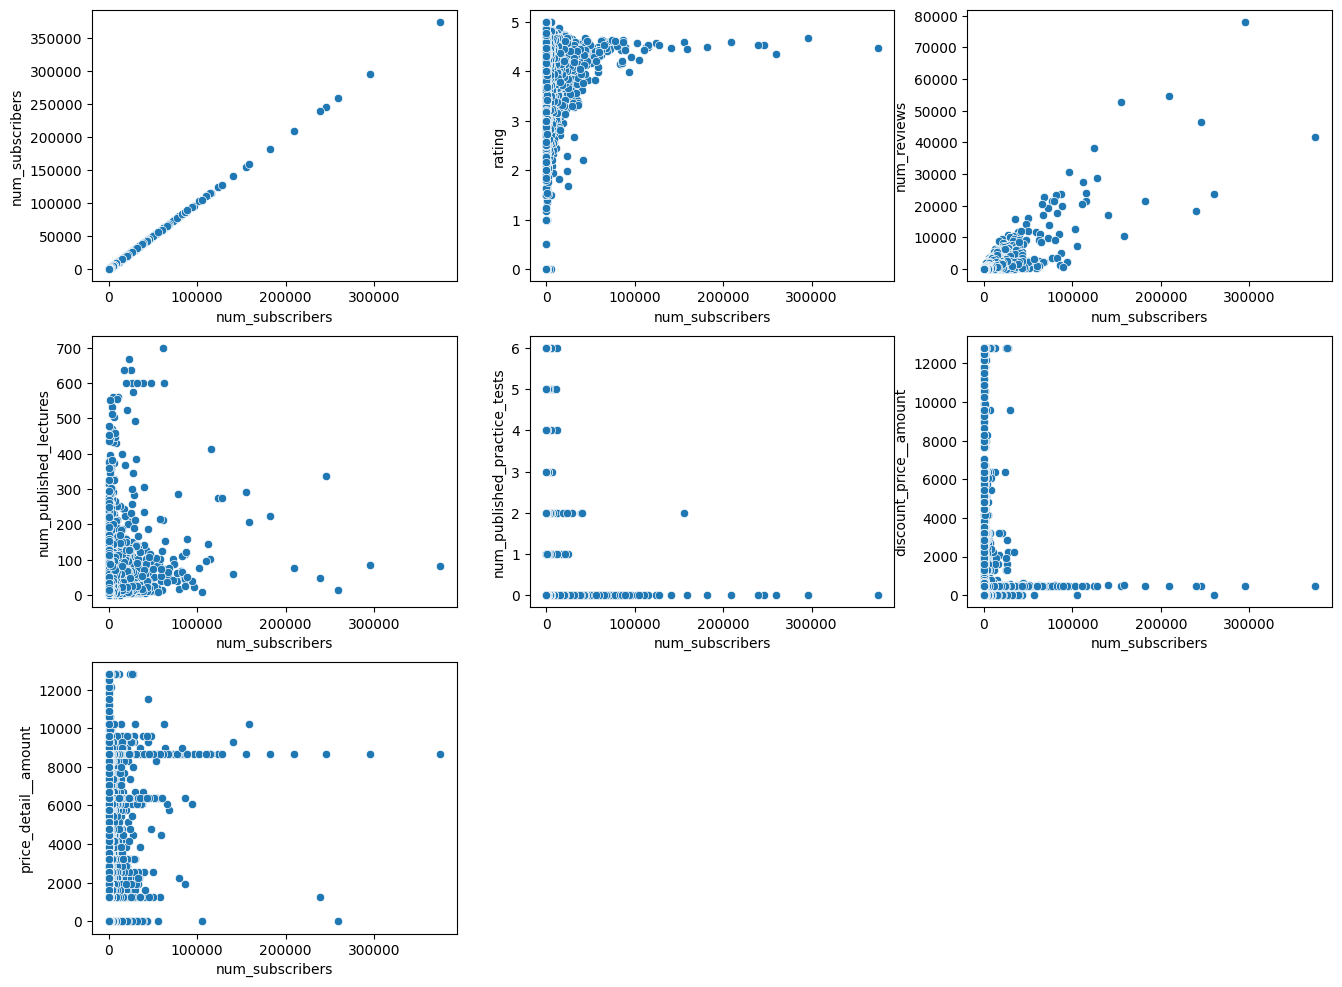

In [42]:
plt.figure(figsize=(16, 12))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i+1) 
    sns.scatterplot(data = df, x = 'num_subscribers', y = numerical_columns[i])

plt.show()

### 3.Multivariate Analysis (Relation between multiple variables)

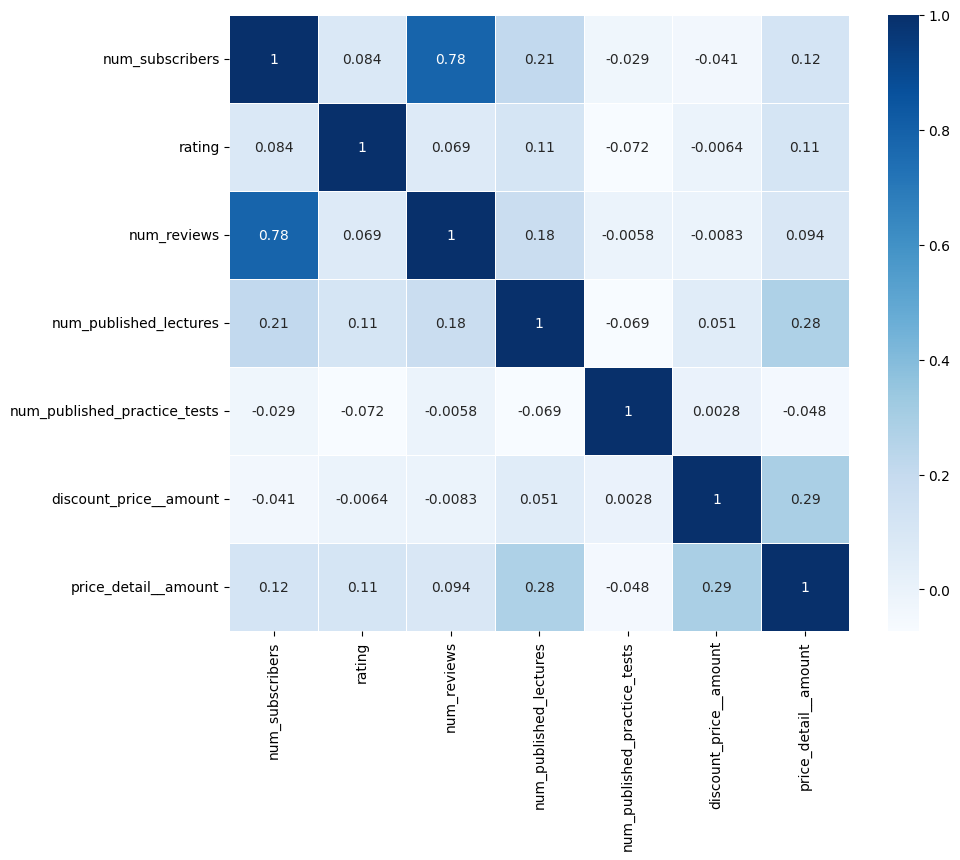

In [43]:
#MultiVariate Analysis

# Plot the heatmap of the correlation between each of the numerical features

plt.figure(figsize=(10, 8))  # Increase figure size
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='Blues', linewidths=0.5)

plt.show()

## Model Selection & Training:

In [16]:
#Removing Target Variable and creating the feature matrix `X`, which will be used for training the model.
x = df[['num_published_lectures', 'num_published_practice_tests', 
        'discount_price__amount', 'price_detail__amount', 
        'is_paid', 'num_reviews', 'rating',]]
x.head()

,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount,is_paid,num_reviews,rating
0,84,0,455.0,8640.0,1,78006,4.67874
1,78,0,455.0,8640.0,1,54581,4.60015
2,292,2,455.0,8640.0,1,52653,4.59326
3,338,0,455.0,8640.0,1,46447,4.53772
4,83,0,455.0,8640.0,1,41630,4.47173


In [17]:
# Creating the Target matrix `Y`, which contains target variable
y = df['num_subscribers']
y.head()

0    295509
1    209070
2    155282
3    245860
4    374836
Name: num_subscribers, dtype: int64

### **Features (X) and Target (y) in Supervised Learning**  

- **Features (X):** Input variables used to predict the target. Examples:  
  - **Number of Published Lectures**  
  - **Number of Published Practice Tests**  
  - **Discount Price Amount**  
  - **Price Detail Amount**  
  - **Is Paid (Free/Paid Course Indicator)**  
  - **Number of Reviews**  
  - **Course Rating**  

- **Target (y):** The output variable we want to predict, i.e., **Number of Enrollments (Course Popularity or Demand)**.  

### **Why Split the Dataset?**  
- **X (Features):** Helps the model learn patterns influencing course enrollments.  
- **y (Target):** The value the model aims to predict.  
- Separating features and target allows the model to understand relationships and make accurate predictions.  

### Split data into training and testing sets.

In [39]:
# Divide the dataset into training (80%) and testing (20%) subsets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

# Display the dimensions of the training and testing sets
print(f"Training set size: {train_x.shape}, Testing set size: {test_x.shape}")

Training set size: (10886, 7), Testing set size: (2722, 7)


### Train the Regression Model

In [52]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(train_x, train_y)

y_pred_rf = rf.predict(test_x)

# Model Evaluation

#### **Evaluating Model Using**

- **Mean Absolute Error (MAE)**: Measures the average absolute difference between actual and predicted values. Lower values indicate better performance.  
- **Mean Squared Error (MSE)**: Penalizes larger errors more than MAE by squaring the differences, making it sensitive to outliers. Lower is better.  
- **Root Mean Squared Error (RMSE)**: The square root of MSE, making it more interpretable as it has the same units as the target variable. Lower values indicate better performance.  
- **R-squared (R²)**: Indicates how well the model explains the variance in the target variable. A value closer to 1 means the model fits the data well.  

In [57]:
# Calculate Mean Squared Error
mse = mean_squared_error(test_y, y_pred_rf)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(test_y, y_pred_rf)
print(f"R-squared: {r2}")

# Calculate MAE
mae = mean_absolute_error(test_y, y_pred_rf)
print(f"Mean Absolute Error: {mae}")

# Calculate MSE
rmse = np.sqrt(mean_squared_error(test_y, y_pred_rf))
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 27157528.69142578
R-squared: 0.7321517169207158
Mean Absolute Error: 2182.298148502939
Root Mean Squared Error: 5211.288582627696


### **Model Evaluation Result**

#### **Mean Absolute Error (MAE)**
- **2182.30**: Indicates the average absolute difference between actual and predicted values. Lower values are better.  

#### **Mean Squared Error (MSE)**
- **27157528.69**: Measures the average squared difference between actual and predicted values, penalizing larger errors more.  

#### **Root Mean Squared Error (RMSE)**
- **5211.29**: The square root of MSE, making it easier to interpret in the same unit as the target variable.  

#### **R-squared (R²)**
- **0.7321**: Suggests that **73.2%** of the variance in the target variable is explained by the model, indicating a strong fit.  

       Actual    Predicted
3001      965  3234.350026
3969      291  2525.583620
2769      493  2506.328259
4987      297   721.187529
12797     109   190.199707


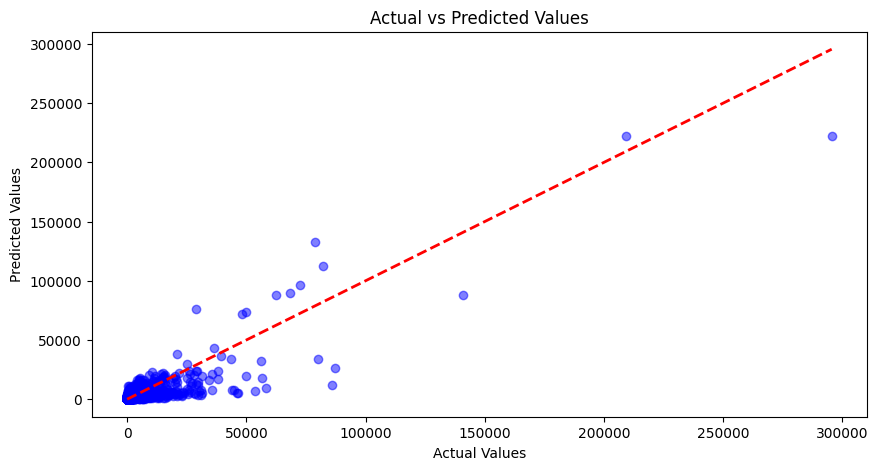

In [58]:
# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred_rf})

# Display the first few rows
print(comparison_df.head())

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(test_y, y_pred_rf, alpha=0.5, color='blue')
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--', lw=2)  # Reference line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

#### **Actual vs Predicted Values**
- **The scatter plot** shows the distribution of actual vs. predicted values.
- The **red dashed line** represents the ideal scenario where predictions perfectly match actual values.
- The model performs well for lower values but tends to **underpredict for higher values**.